# DIgit classfier

### Using tensorflow mnist dataset


In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Getting comfortable with the data


Wanted output - 5
Input -


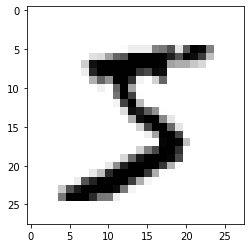

In [4]:
import matplotlib.pyplot as plt

example_index = 0
# y_train is the output  
print("Wanted output -", y_train[example_index])

# x_train is our input as an array of matrices of 28x28 pixels
print("Input -")
plt.imshow(x_train[example_index], cmap = plt.cm.binary)
plt.show()

#### Check if all digits distributes equaly

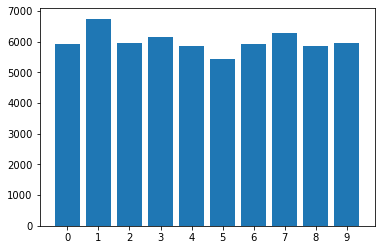

In [5]:
distributionDict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
}

for digit in y_train: 
    distributionDict[digit] += 1
    
plt.bar(range(len(distributionDict)), list(distributionDict.values()), align='center')
plt.xticks(range(len(distributionDict)), list(distributionDict.keys()))

plt.show()

## Creating the model

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 1s 768us/step - loss: 1.5768 - accuracy: 0.8753
Epoch 2/3
1875/1875 [==============================] - 1s 767us/step - loss: 0.3289 - accuracy: 0.9286
Epoch 3/3
1875/1875 [==============================] - 1s 727us/step - loss: 0.2075 - accuracy: 0.9457


### Verifying the model

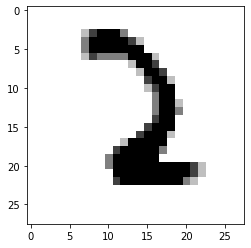

99.99938011169434 it's 2 !


In [153]:
import numpy as np
import random as rand

example_index = rand.randint(0, len(x_test))
plt.imshow(x_test[example_index], cmap = plt.cm.binary)
plt.show()

p = np.array([x_test[example_index]])

predictions = model.predict(p)[0]

for i in range(10):
    success_rate = predictions[i] * 100;
    if(success_rate >= 1):
        print(success_rate, "it's", i, "!")